In [11]:
# فراخوانی کتابخوانه ها و خواندن فایل ها
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
file = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Divar.csv")
df1 = pd.read_csv("/content/drive/MyDrive/cleaned_0_8.csv")
df2 = pd.read_csv("/content/drive/MyDrive/total_price.csv")
df3 = pd.concat([df1, df2], axis=1)
iran_cities = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/iran_city_classification.csv")
land_data = pd.read_csv("/content/drive/MyDrive/land_data_cleaned.csv")["Land"]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-3126261193.py:8: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  file = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Divar.csv")


In [12]:
city_classification = iran_cities.rename(columns={
    'نام شهر': 'city_slug',
    'دسته‌بندی': 'cat'
})
city_classification['cat'] = city_classification['cat'].map({
    'کلان‌شهر': 'metropolitan',
    'شهر کوچک': 'smallcity'
})
# ادغام داده ها
data_set = file.merge(city_classification, on='city_slug', how='left')
data_set = data_set[["city_slug", "cat"]]
data_set = pd.concat([data_set, land_data], axis=1)
data_set = data_set.dropna()
# با بدست آوردن میانگین متراژ در دو دسته و بدست آوردن مقادیر موجود یک دید کلی بدست می آوریم
mean_land_size = data_set.groupby("cat")["Land"].mean()
category_counts = data_set["cat"].value_counts()
print("Mean land size by category:")
print(mean_land_size)
print("\nCategory counts:")
print(category_counts)



Mean land size by category:
cat
metropolitan    310.673249
smallcity       309.941724
Name: Land, dtype: float64

Category counts:
cat
smallcity       469878
metropolitan    438052
Name: count, dtype: int64


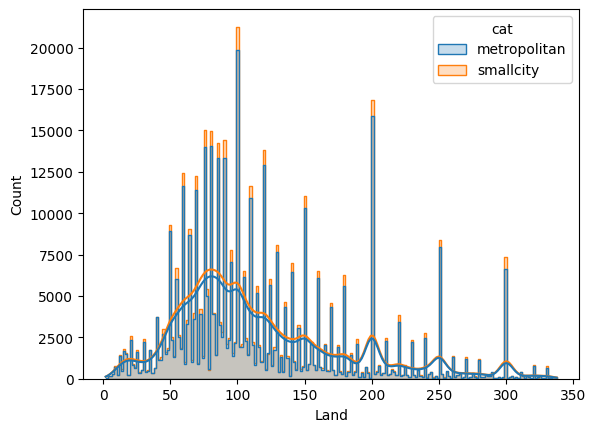

In [13]:
# """طبق مشاهده ما متراژ خانه ها در شهر های کوچک بیشتر است اما برای برسی بهتر باید ببینیم که آیا این
# اختلاف میانگین معناداری دارد یا خیر"""

Q1 = data_set["Land"].quantile(0.25)
Q3 = data_set["Land"].quantile(0.75)
IQR = Q3 - Q1

# محدوده مجاز
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_set = data_set[(data_set["Land"] >= lower_bound) & (data_set["Land"] <= upper_bound)]

sns.histplot(data=data_set, x="Land", hue="cat", kde=True, element="step")
plt.show()

In [14]:
from scipy.stats import ttest_ind
big = data_set[data_set["cat"]== "metropolitan"]["Land"]
small = data_set[data_set["cat"]== "smallcity"]["Land"]
t_stat, p_value = ttest_ind(big, small, equal_var=False, alternative="less")
print(t_stat, p_value)
alpha = 0.5
if alpha < p_value:
  print("H0 is correct")
else:
  print("H1 is correct")

-1.4025999239468627 0.08036827693377828
H1 is correct


بر اساس آزمون فرض انجام شده
بر اساس داده های ما این اختلاف متراژ معنا دار نمیباشد و صرقا در دسته بندی شهر های کوچک داده های پرت زیادی وجود دارد
اما شاید با وجود داده هایی متفاوت این فرضنیز تغیر کند
